### Visualizing Correlations With P2CPs

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import gridspec

from hiveplotlib import P2CP, p2cp_n_axes
from hiveplotlib.p2cp import split_df_on_variable
from hiveplotlib.viz import p2cp_legend, p2cp_viz

A large part of Exploratory Data Analysis involves looking for patterns, with a particularly important pattern between two variables being their correlation. In this notebook, we will look at basic bivariate correlations with Polar Parallel Coordinates Plots (P2CPs). We will compare these figures to corresponding [dot-dash plots](https://bl.ocks.org/g3o2/bd4362574137061c243a2994ba648fb8). We will also cover a toy example that allows us to see *multivariate correlations* with a 3-axis P2CP.

Note, we are replicating the subplots of Figure 9 in [Koplik and Valente, 2021](https://arxiv.org/abs/2109.10193).

#### Toy Data Setup

We will generate four types of 2-variable correlations:

* Positive correlation.
* Negative correlation.
* Heterogeneous correlation.
* No correlation.

By "heterogeneous," we mean that the correlation structure is non-uniform over subsets of the range of a variable. In our example later in this notebook, we consider a toy relationship that is both highly positively correlated and highly negatively correlated at different levels of one of the variables.

In [2]:
# size of noise
SIZE = 0.1

# set the seed
rng = np.random.default_rng(0)

XX = [
    np.linspace(0, 10) + rng.uniform(-SIZE, SIZE, size=50),
    np.linspace(0, 10) + rng.uniform(-SIZE, SIZE, size=50),
    np.linspace(0, 10) + rng.uniform(-SIZE, SIZE, size=50),
    np.linspace(0, 10) + rng.uniform(-SIZE, SIZE, size=50),
]

YY = [
    np.linspace(0, 10) + rng.uniform(-SIZE, SIZE, size=50),
    np.linspace(10, 0) + rng.uniform(-SIZE, SIZE, size=50),
    np.concatenate((np.linspace(0, 10, num=25), np.linspace(10, 0, num=25)))
    + rng.uniform(-SIZE, SIZE, size=50),
    np.zeros(50) + rng.uniform(-SIZE, SIZE, size=50),
]

NAMES = [
    "Positive Relationship",
    "Negative Relationship",
    "Heterogeneous Relationship",
    "No Relationship",
]

#### Positive Correlation

Positive correlations occur when an increase in one variable relates to an increase in the other variable. This looks like an upward-sloping alignment of points in 2-space. For P2CPs, this leads to a pattern of concentric arcs.

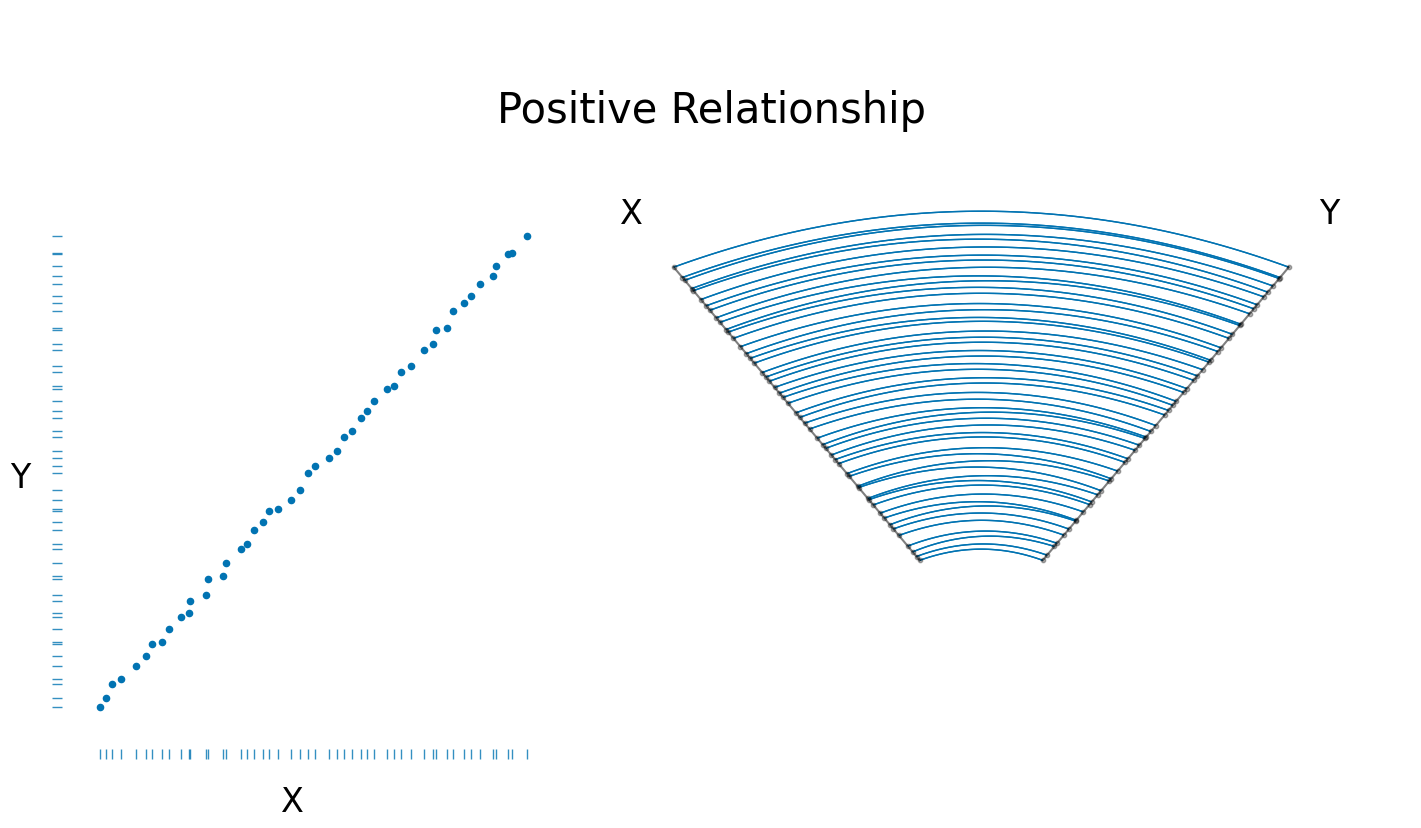

In [3]:
corr_index = 0

data = np.c_[YY[corr_index], XX[corr_index]]

df = pd.DataFrame(data=data, columns=["Y", "X"])

p2cp = P2CP(data=df)
p2cp.set_axes(columns=["Y", "X"], angles=[50, 130])
p2cp.build_edges(color=sns.color_palette("colorblind")[corr_index], alpha=1, lw=1)

fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(4, 8)
ax0 = plt.subplot(gs[1:4, 1:3])
ax1 = plt.subplot(gs[:, 4:])

ax0.scatter(
    df.iloc[:, 1],
    df.iloc[:, 0],
    s=20,
    color=sns.color_palette("colorblind")[corr_index],
)

# dot-dash axes 10% below min data
y_range = (df.iloc[:, 0].to_numpy().min(), df.iloc[:, 0].to_numpy().max())
x_range = (df.iloc[:, 1].to_numpy().min(), df.iloc[:, 1].to_numpy().max())

x_axis_loc = y_range[0] - 0.1 * (y_range[1] - y_range[0])
y_axis_loc = x_range[0] - 0.1 * (x_range[1] - x_range[0])

# x axis
ax0.scatter(
    df.iloc[:, 1],
    np.repeat(x_axis_loc, df.shape[0]),
    s=60,
    color=sns.color_palette("colorblind")[corr_index],
    marker="|",
    lw=1,
    alpha=0.8,
)
# y axis
ax0.scatter(
    np.repeat(y_axis_loc, df.shape[0]),
    df.iloc[:, 0],
    s=60,
    color=sns.color_palette("colorblind")[corr_index],
    marker="_",
    lw=1,
    alpha=0.8,
)

ax0.set_xlabel(df.columns.to_numpy()[1], size=24)
ax0.set_ylabel(df.columns.to_numpy()[0], rotation=0, labelpad=10, size=24)
ax0.set_xticks([])
ax0.set_yticks([])
sns.despine()
ax0.spines["bottom"].set_color("white")
ax0.spines["left"].set_color("white")

p2cp_viz(
    p2cp, fig=fig, ax=ax1, axes_labels_fontsize=24, node_kwargs={"s": 10, "alpha": 0.3}
)
ax1.set_xlim(-4.5, 4.5)
ax1.set_ylim(0, 5)
fig.subplots_adjust(wspace=-0.5)
fig.suptitle(NAMES[corr_index], size=30, y=0.8, x=0.55)
plt.show()

#### Negative Correlation

Negative correlations occur when an increase in one variable relates to a *decrease* in the other variable. This looks like an downward-sloping alignment of points in 2-space. For P2CPs, this leads to a "butterfly" pattern of arcs.

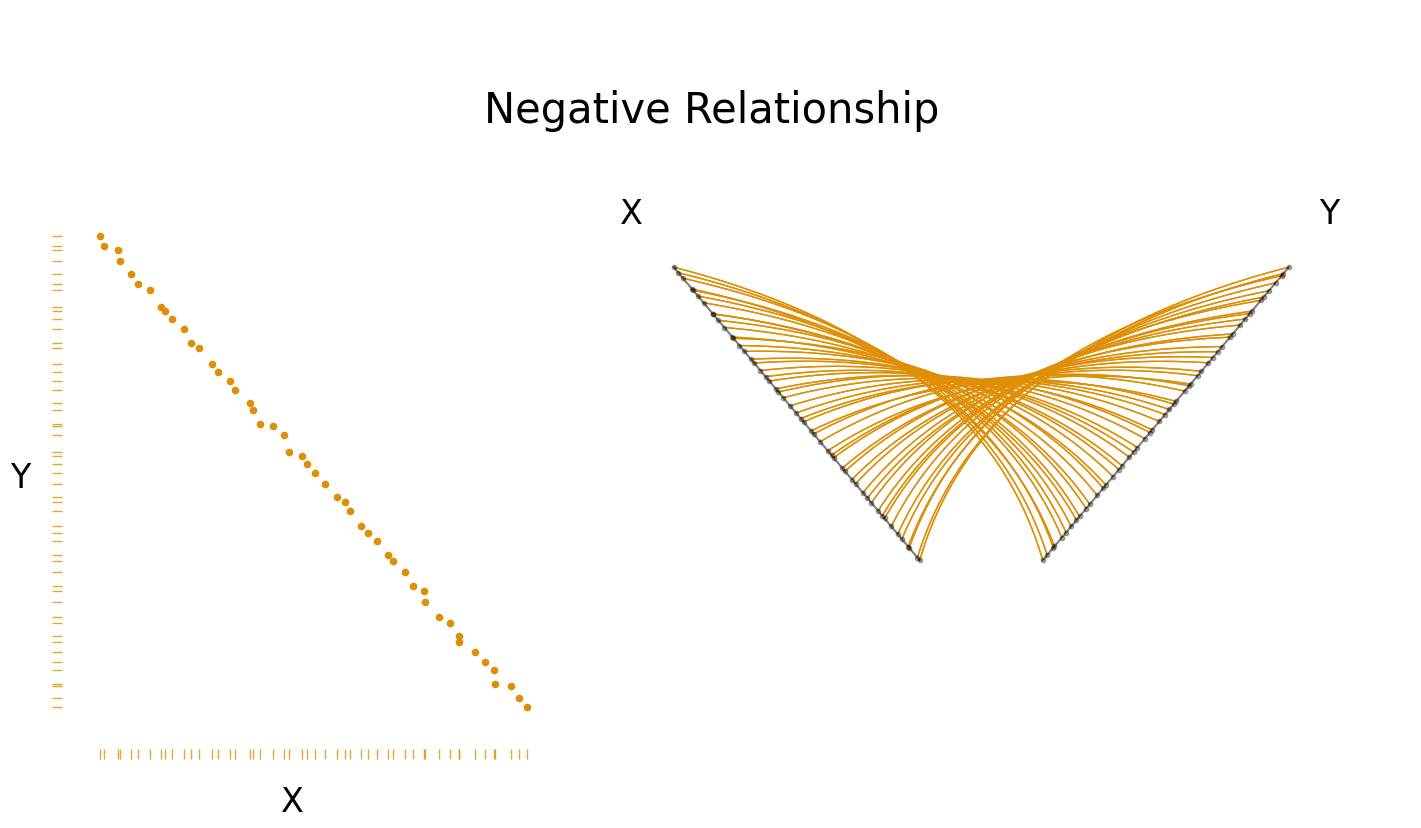

In [4]:
corr_index = 1

data = np.c_[YY[corr_index], XX[corr_index]]

df = pd.DataFrame(data=data, columns=["Y", "X"])

p2cp = P2CP(data=df)
p2cp.set_axes(columns=["Y", "X"], angles=[50, 130])
p2cp.build_edges(color=sns.color_palette("colorblind")[corr_index], alpha=1, lw=1)

fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(4, 8)
ax0 = plt.subplot(gs[1:4, 1:3])
ax1 = plt.subplot(gs[:, 4:])

ax0.scatter(
    df.iloc[:, 1],
    df.iloc[:, 0],
    s=20,
    color=sns.color_palette("colorblind")[corr_index],
)

# dot-dash axes 10% below min data
y_range = (df.iloc[:, 0].to_numpy().min(), df.iloc[:, 0].to_numpy().max())
x_range = (df.iloc[:, 1].to_numpy().min(), df.iloc[:, 1].to_numpy().max())

x_axis_loc = y_range[0] - 0.1 * (y_range[1] - y_range[0])
y_axis_loc = x_range[0] - 0.1 * (x_range[1] - x_range[0])

# x axis
ax0.scatter(
    df.iloc[:, 1],
    np.repeat(x_axis_loc, df.shape[0]),
    s=60,
    color=sns.color_palette("colorblind")[corr_index],
    marker="|",
    lw=1,
    alpha=0.8,
)
# y axis
ax0.scatter(
    np.repeat(y_axis_loc, df.shape[0]),
    df.iloc[:, 0],
    s=60,
    color=sns.color_palette("colorblind")[corr_index],
    marker="_",
    lw=1,
    alpha=0.8,
)

ax0.set_xlabel(df.columns.to_numpy()[1], size=24)
ax0.set_ylabel(df.columns.to_numpy()[0], rotation=0, labelpad=10, size=24)
ax0.set_xticks([])
ax0.set_yticks([])
sns.despine()
ax0.spines["bottom"].set_color("white")
ax0.spines["left"].set_color("white")

p2cp_viz(
    p2cp, fig=fig, ax=ax1, axes_labels_fontsize=24, node_kwargs={"s": 10, "alpha": 0.3}
)
ax1.set_xlim(-4.5, 4.5)
ax1.set_ylim(0, 5)
fig.subplots_adjust(wspace=-0.5)
fig.suptitle(NAMES[corr_index], size=30, y=0.8, x=0.55)
plt.show()

#### No Correlation

No correlation looks exactly as we would hope both in 2-space and for P2CPs. In 2-space, we see a random alignment of points. For our P2CP, we see an unrelated collection of arcs. 

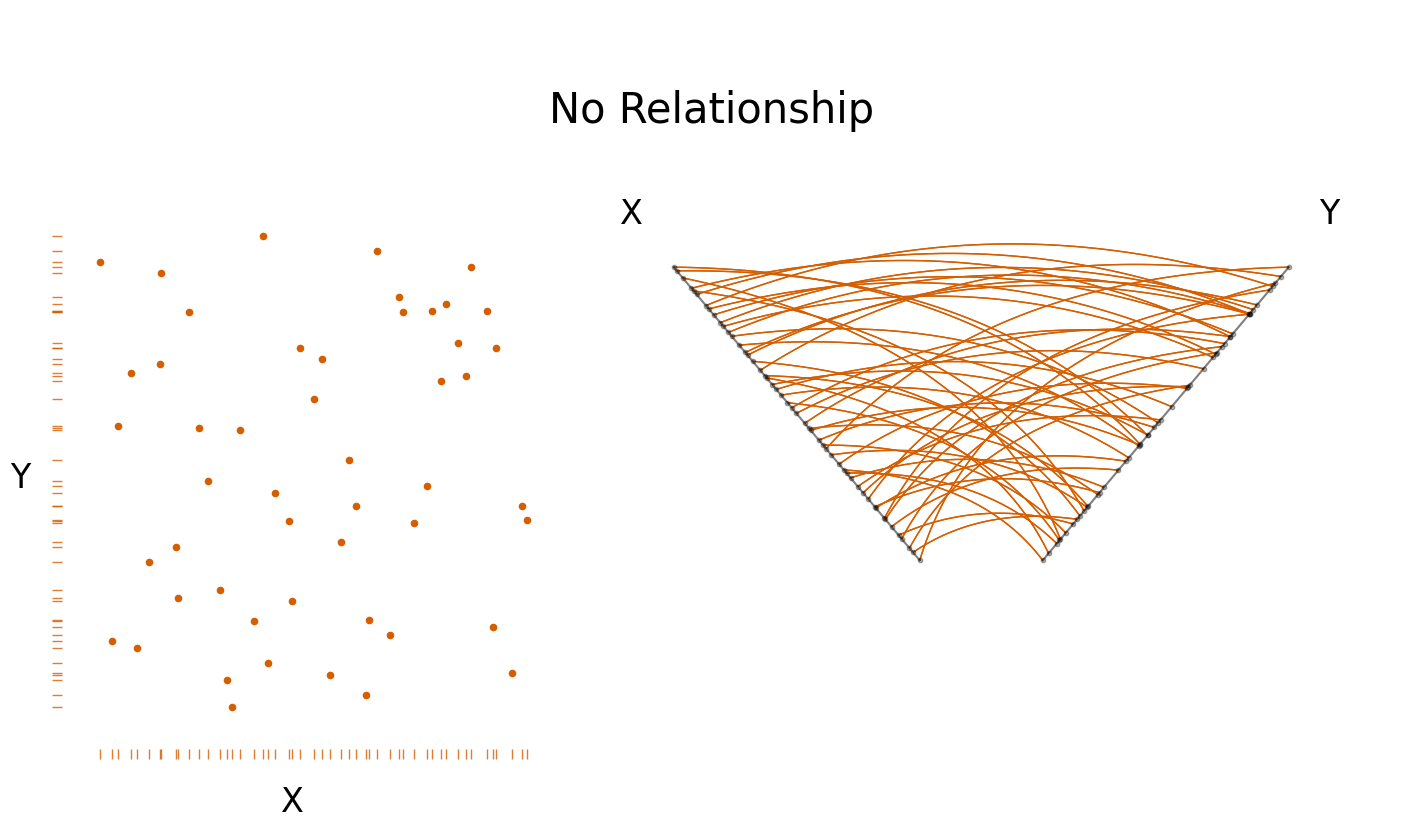

In [5]:
corr_index = 3

data = np.c_[YY[corr_index], XX[corr_index]]

df = pd.DataFrame(data=data, columns=["Y", "X"])

p2cp = P2CP(data=df)
p2cp.set_axes(columns=["Y", "X"], angles=[50, 130])
p2cp.build_edges(color=sns.color_palette("colorblind")[corr_index], alpha=1, lw=1)

fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(4, 8)
ax0 = plt.subplot(gs[1:4, 1:3])
ax1 = plt.subplot(gs[:, 4:])

ax0.scatter(
    df.iloc[:, 1],
    df.iloc[:, 0],
    s=20,
    color=sns.color_palette("colorblind")[corr_index],
)

# dot-dash axes 10% below min data
y_range = (df.iloc[:, 0].to_numpy().min(), df.iloc[:, 0].to_numpy().max())
x_range = (df.iloc[:, 1].to_numpy().min(), df.iloc[:, 1].to_numpy().max())

x_axis_loc = y_range[0] - 0.1 * (y_range[1] - y_range[0])
y_axis_loc = x_range[0] - 0.1 * (x_range[1] - x_range[0])

# x axis
ax0.scatter(
    df.iloc[:, 1],
    np.repeat(x_axis_loc, df.shape[0]),
    s=60,
    color=sns.color_palette("colorblind")[corr_index],
    marker="|",
    lw=1,
    alpha=0.8,
)
# y axis
ax0.scatter(
    np.repeat(y_axis_loc, df.shape[0]),
    df.iloc[:, 0],
    s=60,
    color=sns.color_palette("colorblind")[corr_index],
    marker="_",
    lw=1,
    alpha=0.8,
)

ax0.set_xlabel(df.columns.to_numpy()[1], size=24)
ax0.set_ylabel(df.columns.to_numpy()[0], rotation=0, labelpad=10, size=24)
ax0.set_xticks([])
ax0.set_yticks([])
sns.despine()
ax0.spines["bottom"].set_color("white")
ax0.spines["left"].set_color("white")

p2cp_viz(
    p2cp, fig=fig, ax=ax1, axes_labels_fontsize=24, node_kwargs={"s": 10, "alpha": 0.3}
)
ax1.set_xlim(-4.5, 4.5)
ax1.set_ylim(0, 5)
fig.subplots_adjust(wspace=-0.5)
fig.suptitle(NAMES[corr_index], size=30, y=0.8, x=0.55)
plt.show()

#### Heterogeneous Correlation

Heterogeneous correlations cannot be condensed into a single "known" shape. They can, however, be thought of as a *union* of patterns that may show up in any combination. For our toy example, we set up both a positive correlation (for low `X` values) and a negative correlation (for high `X` values). By construction of our example, we thus see *both* an upward-sloping alignment of points *as well as* a downward-sloping alignment of points in 2-space. For P2CPs, this leads to both a pattern of concentric arcs *and* a butterfly pattern.

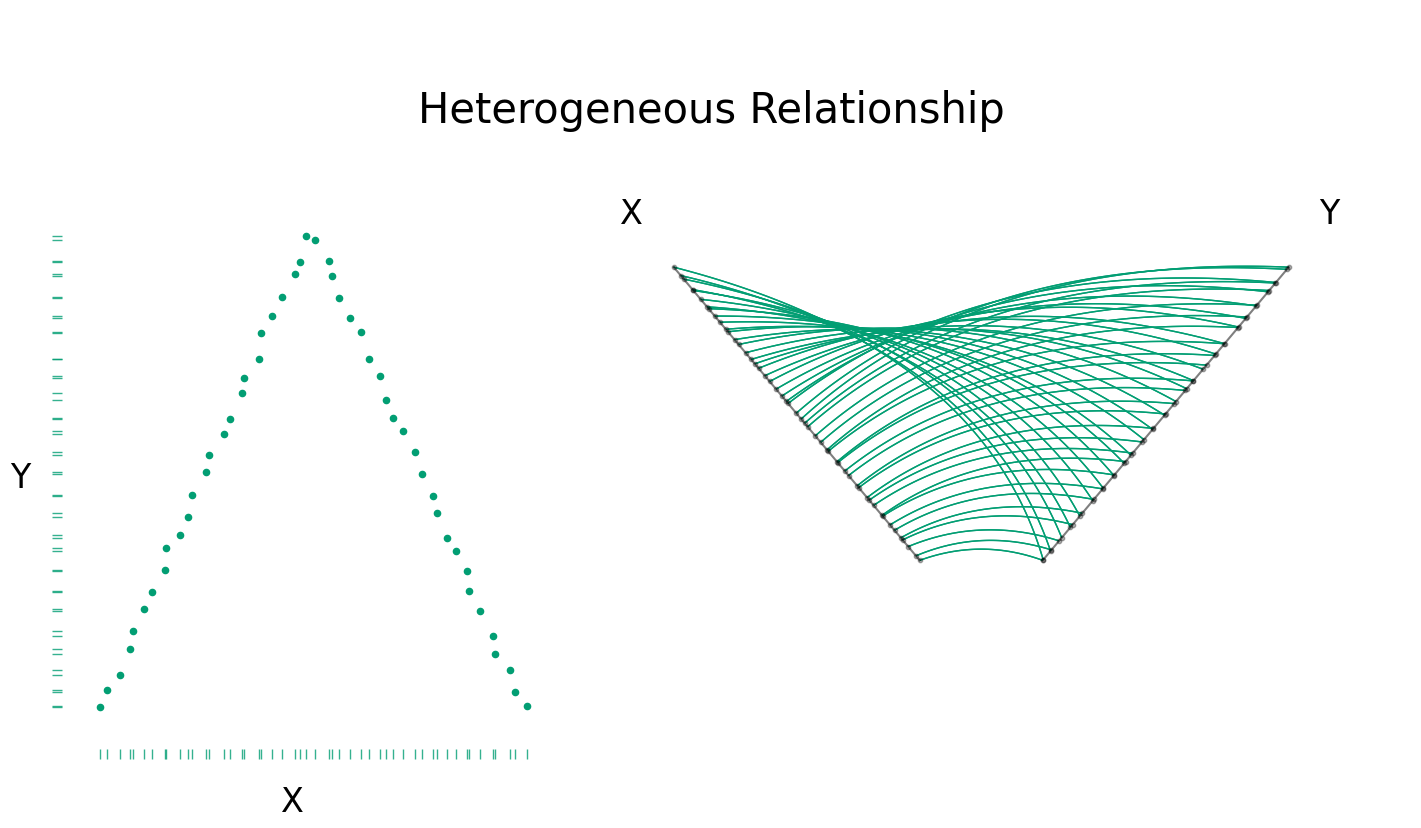

In [6]:
corr_index = 2

data = np.c_[YY[corr_index], XX[corr_index]]

df = pd.DataFrame(data=data, columns=["Y", "X"])

p2cp = P2CP(data=df)
p2cp.set_axes(columns=["Y", "X"], angles=[50, 130])
p2cp.build_edges(color=sns.color_palette("colorblind")[corr_index], alpha=1, lw=1)

fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(4, 8)
ax0 = plt.subplot(gs[1:4, 1:3])
ax1 = plt.subplot(gs[:, 4:])

ax0.scatter(
    df.iloc[:, 1],
    df.iloc[:, 0],
    s=20,
    color=sns.color_palette("colorblind")[corr_index],
)

# dot-dash axes 10% below min data
y_range = (df.iloc[:, 0].to_numpy().min(), df.iloc[:, 0].to_numpy().max())
x_range = (df.iloc[:, 1].to_numpy().min(), df.iloc[:, 1].to_numpy().max())

x_axis_loc = y_range[0] - 0.1 * (y_range[1] - y_range[0])
y_axis_loc = x_range[0] - 0.1 * (x_range[1] - x_range[0])

# x axis
ax0.scatter(
    df.iloc[:, 1],
    np.repeat(x_axis_loc, df.shape[0]),
    s=60,
    color=sns.color_palette("colorblind")[corr_index],
    marker="|",
    lw=1,
    alpha=0.8,
)
# y axis
ax0.scatter(
    np.repeat(y_axis_loc, df.shape[0]),
    df.iloc[:, 0],
    s=60,
    color=sns.color_palette("colorblind")[corr_index],
    marker="_",
    lw=1,
    alpha=0.8,
)

ax0.set_xlabel(df.columns.to_numpy()[1], size=24)
ax0.set_ylabel(df.columns.to_numpy()[0], rotation=0, labelpad=10, size=24)
ax0.set_xticks([])
ax0.set_yticks([])
sns.despine()
ax0.spines["bottom"].set_color("white")
ax0.spines["left"].set_color("white")

p2cp_viz(
    p2cp, fig=fig, ax=ax1, axes_labels_fontsize=24, node_kwargs={"s": 10, "alpha": 0.3}
)
ax1.set_xlim(-4.5, 4.5)
ax1.set_ylim(0, 5)
fig.subplots_adjust(wspace=-0.5)
fig.suptitle(NAMES[corr_index], size=30, y=0.8, x=0.55)
plt.show()

#### Multivariate Heterogeneous Correlations

Heterogeneous correlations between *multiple* variables can lead to interesting multivariate correlations. Below we consider a 3-variable toy example, where two of the relationships follow the above heterogeneous correlation, and the last relationship follows the above negative correlation.

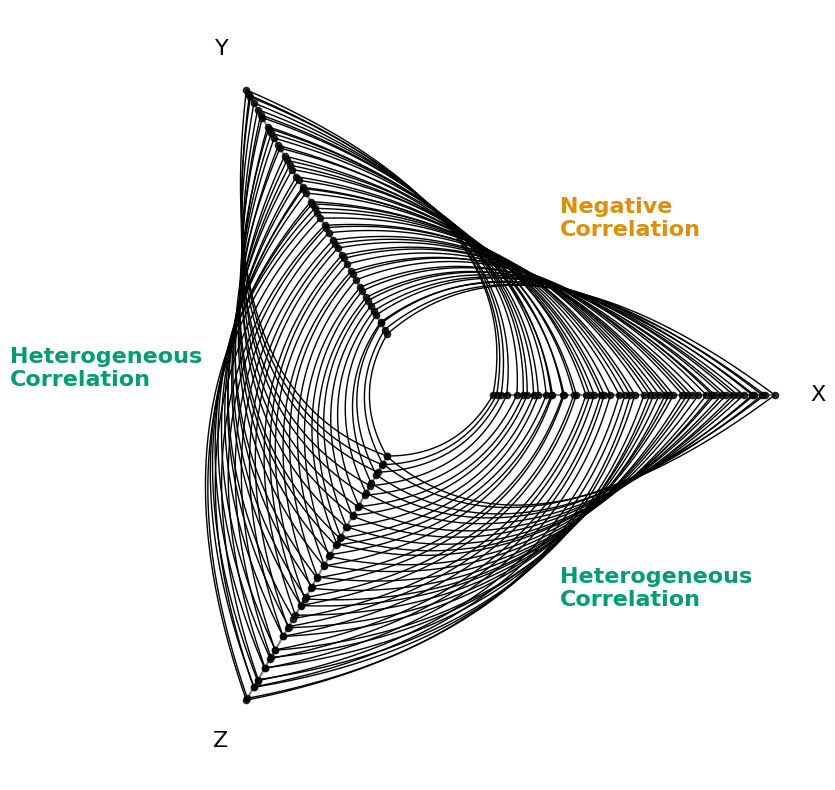

In [7]:
color_indices = [1, 2, 2]

data = np.c_[XX[0], YY[1], YY[2]]

df = pd.DataFrame(data=data, columns=["X", "Y", "Z"])


p2cp = p2cp_n_axes(df, all_edge_kwargs={"alpha": 1, "lw": 1})

fig, ax = p2cp_viz(p2cp)

fig.text(
    0.65,
    0.65,
    "Negative\nCorrelation",
    weight="heavy",
    ha="left",
    va="bottom",
    fontsize=16,
    color=sns.color_palette("colorblind")[1],
)

fig.text(
    0.1,
    0.5,
    "Heterogeneous\nCorrelation",
    weight="heavy",
    ha="left",
    va="bottom",
    fontsize=16,
    color=sns.color_palette("colorblind")[2],
)

fig.text(
    0.65,
    0.28,
    "Heterogeneous\nCorrelation",
    weight="heavy",
    ha="left",
    va="bottom",
    fontsize=16,
    color=sns.color_palette("colorblind")[2],
)
plt.show()

As you can probably guess, heterogeneous correlations leads to heterogenous patterns at different levels in the data. Since our `Z` variable here is the source of the heterogeneous behavior, these different patterns are particularly noticeable comparing high `Z` points to low `Z` points with the below figures.

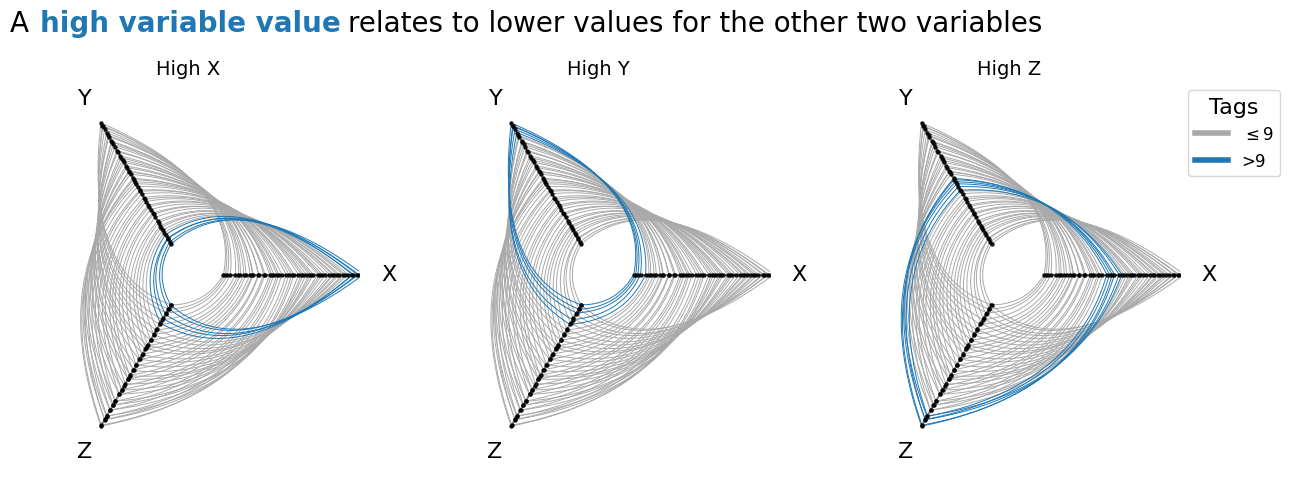

In [8]:
cutoff = 9
labels = [rf"$\leq${cutoff}", f">{cutoff}"]

splits = [
    split_df_on_variable(df=df, column=i, cutoffs=[cutoff], labels=labels)
    for i in df.columns
]


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, split in enumerate(splits):
    p2cp = p2cp_n_axes(
        df,
        split_on=split,
        all_edge_kwargs={"alpha": 1, "lw": 0.7},
        indices_list_kwargs=[{"color": "darkgray"}, {"color": "C0"}],
    )

    p2cp_viz(p2cp, fig=fig, ax=axes[i], node_kwargs={"s": 5})
    axes[i].set_title(f"High {df.columns[i]}", size=14)
p2cp_legend(
    p2cp, fig, axes[-1], line_kwargs={"lw": 4}, prop={"size": 12}, title_fontsize=16
)

fig.text(0.12, 0.97, "A", ha="left", va="bottom", fontsize=20, color="black")
fig.text(
    0.14,
    0.97,
    "high variable value",
    weight="heavy",
    ha="left",
    va="bottom",
    fontsize=20,
    color="C0",
)
fig.text(
    0.345,
    0.97,
    "relates to lower values for the other two variables",
    ha="left",
    va="bottom",
    fontsize=20,
    color="black",
)

plt.show()

These "teardrop" patterns are indicative of highly negative correlations for high `X`, `Y`, or `Z` values with respect to the other two variables.

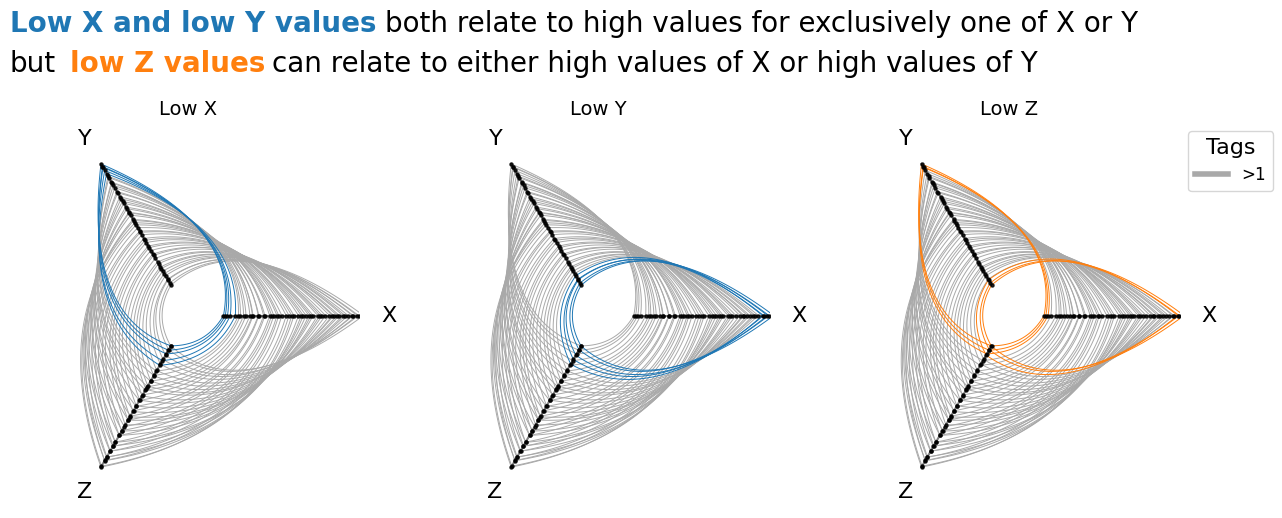

In [9]:
cutoff = 1
labels = [rf"$\leq${cutoff}", f">{cutoff}"]

splits = [
    split_df_on_variable(df=df, column=i, cutoffs=[cutoff], labels=labels)
    for i in df.columns
]

# colors for highlighted edges for each plot
colors = ["C0", "C0", "C1"]


fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, split in enumerate(splits):
    p2cp = p2cp_n_axes(
        df,
        split_on=split,
        all_edge_kwargs={"alpha": 1, "lw": 0.7},
        indices_list_kwargs=[
            {"color": colors[i], "zorder": 2},
            {"color": "darkgray", "zorder": 1},
        ],
    )

    p2cp_viz(p2cp, fig=fig, ax=axes[i], node_kwargs={"s": 5})
    axes[i].set_title(f"Low {df.columns[i]}", size=14)
p2cp_legend(
    p2cp,
    fig,
    axes[-1],
    tags=[f">{cutoff}"],
    line_kwargs={"lw": 4},
    prop={"size": 12},
    title_fontsize=16,
)

fig.text(
    0.12,
    1.05,
    "Low X and low Y values",
    weight="heavy",
    ha="left",
    va="bottom",
    fontsize=20,
    color="C0",
)
fig.text(
    0.37,
    1.05,
    "both relate to high values for exclusively one of X or Y",
    ha="left",
    va="bottom",
    fontsize=20,
    color="black",
)
fig.text(0.12, 0.97, "but", ha="left", va="bottom", fontsize=20, color="black")
fig.text(
    0.16,
    0.97,
    "low Z values",
    weight="heavy",
    ha="left",
    va="bottom",
    fontsize=20,
    color="C1",
)
fig.text(
    0.295,
    0.97,
    "can relate to either high values of X or high values of Y",
    ha="left",
    va="bottom",
    fontsize=20,
    color="black",
)


plt.show()

When we switch to looking at low variable values, we find the same single teardrop patterns for low `X` and Low `Y` values. For these two cases, we see that the low variable is positively correlated with one variable but negatively correlated with the other.

For `Z` though, we see *two patterns* as exhibited by two teardrops in orange. `Z` is corresponds to *either* high `X` and low `Y` *or* low `X` and high `Y`.

If we were to look at the correlation of low `Z` values with `X` and `Y`, this dual behavior would wash out any correlation, but with a P2CP, we observe 2 sets of multivariate patterns that encourage further exploration into what drives the heterogeneity within this subgroup of `Z` values.

#### References

Koplik, Gary, and Ashlee Valente. "The Parallel Coordinates Plot Revisited: Visual Extensions from Hive Plots, Heterogeneous Correlations, and an Exploration of Covid-19 Data in the United States." arXiv preprint arXiv:2109.10193 (2021).